In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.hopf import HopfModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_hopf
from neurolib.optimal_control import cost_functions as cost_functions

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

# We define colors for later convenience
color_x = 'red'
color_y = 'blue'

In [2]:
# define plot function for later convenience
def plot_singlenode(model, duration, dt, state, target, control, input, weight_array=[], M=1):
    fig, ax = plt.subplots( 3,1, figsize=(8,6), constrained_layout=True)

    # Plot the target (dashed line) and unperturbed activity
    t_array = np.arange(0, duration+dt, dt)

    ax[0].plot(t_array, state[0,0,:], label="x", color=color_x, linewidth=1)
    ax[0].plot(t_array, state[0,1,:], label="y", color=color_y, linewidth=1)
    ax[0].plot(t_array, target[0,0,:], linestyle='dashed', label="Target x", color=color_x)
    ax[0].plot(t_array, target[0,1,:], linestyle='dashed', label="Target y", color=color_y)
    ax[0].legend()
    ax[0].set_title("Activity without stimulation and target activity")

    for m in range(M-1):
        model.run()
        state = np.concatenate((np.concatenate( (model.params["xs_init"], model.params["ys_init"]), axis=1)[:,:, np.newaxis], np.stack( (model.x, model.y), axis=1)), axis=2)
        ax[0].plot(t_array, state[0,0,:], label="x", color=color_x, linewidth=1)
        ax[0].plot(t_array, state[0,1,:], label="y", color=color_y, linewidth=1)

    # Plot the target control signal (dashed line) and "initial" zero control signal
    ax[1].plot(t_array, control[0,0,:], label="stimulation x", color=color_x)
    ax[1].plot(t_array, control[0,1,:], label="stimulation y", color=color_y)
    ax[1].plot(t_array, input[0,0,:], linestyle='dashed', label="input x", color=color_x)
    ax[1].plot(t_array, input[0,1,:], linestyle='dashed', label="input y", color=color_y)
    ax[1].legend()
    ax[1].set_title("Active stimulation and input stimulation")

    ax[2].plot(weight_array)
    ax[2].set_title("Cost throughout optimization.")

    plt.show()

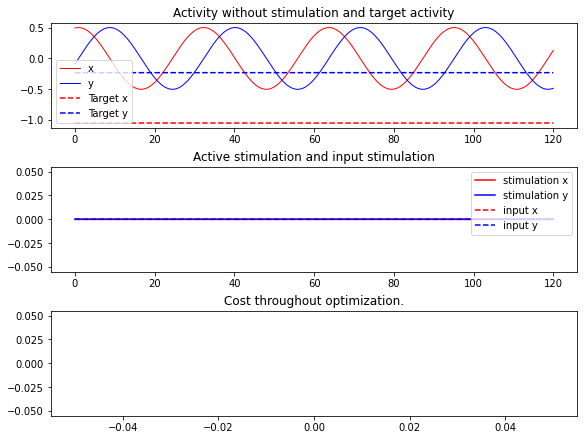

In [3]:
hopf = HopfModel()
hopf.params.sigma_ou = 0.
hopf.params.x_ou_mean = -1.

dt = hopf.params["dt"]
duration = 120.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]

hopf.params["duration"] = duration
x_init = 0.
y_init = 0.
hopf.params["xs_init"] = np.array([[x_init]])
hopf.params["ys_init"] = np.array([[y_init]])
hopf.params["x_ext"] = zero_input
hopf.params["y_ext"] = zero_input
hopf.run()

x_init_down = np.array([[hopf.x[0,-1]]])
y_init_down = np.array([[hopf.y[0,-1]]])
hopf.params["xs_init"] = x_init_down
hopf.params["ys_init"] = y_init_down
hopf.run()

target = np.concatenate((np.concatenate( (hopf.params["xs_init"], hopf.params["ys_init"]), axis=1)[:,:, np.newaxis], np.stack( (hopf.x, hopf.y), axis=1)), axis=2)

hopf.params.x_ou_mean = 0.
hopf.params["xs_init"] = np.array([[0.1]])
hopf.params["ys_init"] = np.array([[y_init]])
hopf.run()

x_init_osc = np.array([[hopf.x[0,-1]]])
y_init_osc = np.array([[hopf.y[0,-1]]])
hopf.params["xs_init"] = x_init_osc
hopf.params["ys_init"] = y_init_osc
hopf.run()

state = np.concatenate((np.concatenate( (hopf.params["xs_init"], hopf.params["ys_init"]), axis=1)[:,:, np.newaxis], np.stack( (hopf.x, hopf.y), axis=1)), axis=2)

plot_singlenode(hopf, duration, dt, state, target, zero_control, zero_control)

Compute control for a deterministic system


/home/lena/.local/lib/python3.9/site-packages/numba/core/ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'interval' of function 'precision_cost'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../neurolib/optimal_control/cost_functions.py", line 6:
@numba.njit
def precision_cost(x_target, x_sim, w_p, N, precision_matrix, interval=(0, None)):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Cost in iteration 0: 95.65018134882192


/home/lena/.local/lib/python3.9/site-packages/numba/core/ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'interval' of function 'derivative_precision_cost'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../neurolib/optimal_control/cost_functions.py", line 55:
@numba.njit
def derivative_precision_cost(x_target, x_sim, w_p, precision_matrix, interval=(0, None)):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
ERROR:root:nan in model output!
ERROR:root:nan in model output!


diverging model output, decrease step size to  5.0
Cost in iteration 1: 92.77475538050761
diverging model output, decrease step size to  2.5
Cost in iteration 2: 67.95511529068794
Cost in iteration 3: 42.25984600194657
Cost in iteration 4: 11.37120265584387
Cost in iteration 5: 6.704253846768344
Cost in iteration 6: 5.181354189060437
Cost in iteration 7: 4.073101747363475
Cost in iteration 8: 3.2373270108300507
Cost in iteration 9: 2.6236217314342056
Cost in iteration 10: 2.188118495101084
Cost in iteration 11: 1.8913172923089345
Cost in iteration 12: 1.7052101685566126
Cost in iteration 13: 1.6365225269549737
Cost in iteration 14: 1.516316444285472
Cost in iteration 15: 1.5062770536321763
Cost in iteration 16: 1.4166846852876493
Cost in iteration 17: 1.3754923638611325
Cost in iteration 18: 1.3667319977745516
Cost in iteration 19: 1.3259416449375994
Cost in iteration 20: 1.3020837447026183
Cost in iteration 21: 1.3007662447095094
Cost in iteration 22: 1.2719977010651375
Cost in iterat

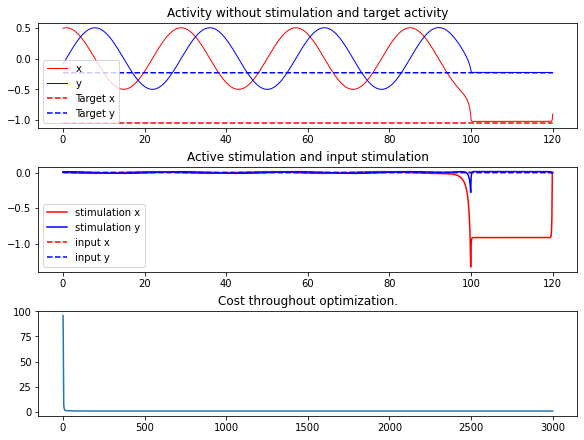

In [4]:
hopf.params["x_ext"] = zero_input
hopf.params["y_ext"] = zero_input
w2 = 1e-2
wp = 1.
printarray = np.concatenate( (np.arange(0,101,1), np.arange(200,1001,100), np.arange(2000,10001,1000)) )
hopf_controlled_noisefree = oc_hopf.OcHopf(hopf, target, w_p=wp, w_2=w2, print_array=printarray, precision_cost_interval=[1000,None])

# We run 100 iterations of the optimal control gradient descent algorithm
hopf_controlled_noisefree.optimize(3000)

state = hopf_controlled_noisefree.get_xs()
control_noisefree = hopf_controlled_noisefree.control

plot_singlenode(hopf_controlled_noisefree.model, duration, dt, state, target, control_noisefree, zero_control, hopf_controlled_noisefree.cost_history)


Compute control for a deterministic system
Cost in iteration 0: 0.9385056933960368
Cost in iteration 1: 0.9385056927089271
Cost in iteration 2: 0.9385056926142877
Cost in iteration 3: 0.9385056919460747
Cost in iteration 4: 0.9385056918355097
Cost in iteration 5: 0.9385056911852839
Cost in iteration 6: 0.9385056910596241
Cost in iteration 7: 0.9385056904265374
Cost in iteration 8: 0.9385056902865723
Cost in iteration 9: 0.9385056896698151
Cost in iteration 10: 0.9385056895162888
Cost in iteration 11: 0.938505688915103
Cost in iteration 12: 0.9385056887487163
Cost in iteration 13: 0.9385056881623844
Cost in iteration 14: 0.938505687983803
Cost in iteration 15: 0.9385056874116311
Cost in iteration 16: 0.9385056872214916
Cost in iteration 17: 0.938505686662843
Cost in iteration 18: 0.9385056864617403
Cost in iteration 19: 0.9385056859159988
Cost in iteration 20: 0.9385056857045018
Cost in iteration 21: 0.9385056851710823
Cost in iteration 22: 0.9385056849497269
Cost in iteration 23: 0.938

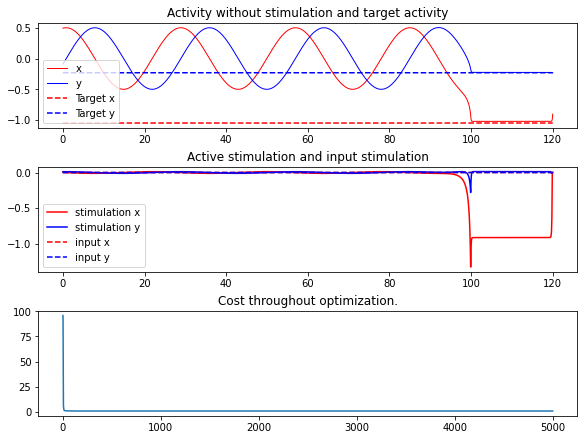

In [24]:
hopf_controlled_noisefree.optimize(1000)

state = hopf_controlled_noisefree.get_xs()
control_noisefree = hopf_controlled_noisefree.control

plot_singlenode(hopf_controlled_noisefree.model, duration, dt, state, target, control_noisefree, zero_control, hopf_controlled_noisefree.cost_history)

In [6]:
sigma_array = [5. * 1e-2, 1. * 1e-1, 5.* 1e-1]
M_array = [4,20,50,100]

weights = np.zeros(( len(sigma_array) ))
controls = [ [None, None, None, None], [None, None, None, None], [None, None, None, None] ]
costs_history = [ [None, None, None, None], [None, None, None, None], [None, None, None, None] ]
costs = np.zeros(( len(sigma_array), len(M_array)+1 ))

In [7]:
hopf_noise = HopfModel()
hopf_noise.params.sigma_ou = 0.
hopf_noise.params.x_ou_mean = 0.

In [8]:
hopf_noise.params.duration = 1. * 1e7
hopf_noise.params["xs_init"] = np.array([[x_init_down]])
hopf_noise.params["ys_init"] = np.array([[y_init_down]])
hopf_noise.params["x_ext"] = zero_input
hopf_noise.params["y_ext"] = zero_input

for i_s in range(len(sigma_array)):
    hopf_noise.params.sigma_ou = sigma_array[i_s]

    hopf_noise.run()
    weights[i_s] = 1. / (np.std(hopf_noise.x[0,100:]) + np.std(hopf_noise.y[0,100:]) )

print(weights)

# [45.99594752  9.07230569]

[1.29712768 1.11928913 0.70059918]


In [19]:
hopf_noise.params.duration = duration
hopf_noise.params["xs_init"] = x_init_osc
hopf_noise.params["ys_init"] = y_init_osc

hopf_noise.params.x_ou_mean = 0.
M_val = 500
max_iterations = 100
hopf_noise.run()
printarray = np.concatenate( (np.arange(0,100,10), np.arange(0,1001,100)) )

costs_history = [ [None, None, None, None], [None, None, None, None], [None, None, None, None] ]

for i_s in range(len(sigma_array)):
    for i_m in range(len(M_array)):

        if i_m in []:
            continue

        if i_s in []:
            continue

        if type(costs_history[i_s][i_m]) != type(None):
            continue

        print("--------------------------------------------------------------")
        print("---------------------------- sigma, M = ", sigma_array[i_s], M_array[i_m])

        hopf_noise.params["x_ext"] = zero_input
        hopf_noise.params["y_ext"] = zero_input
        hopf_noise.params.sigma_ou = sigma_array[i_s]

        hopf_controlled_models = oc_hopf.OcHopf(hopf_noise, target, w_p=wp, w_2=w2, print_array=printarray, precision_cost_interval=[1000,None],
                                    M=int(M_array[i_m]),
                                    #M = 10,
                                    M_validation=M_val, validate_per_step=True)

        # We run 100 iterations of the optimal control gradient descent algorithm
        hopf_controlled_models.optimize(max_iterations)

        state = hopf_controlled_models.get_xs()
        controls[i_s][i_m] = hopf_controlled_models.control
        costs_history[i_s][i_m] = hopf_controlled_models.cost_history
        costs[i_s][i_m+1] = hopf_controlled_models.cost_validation

        # plot_singlenode(hopf_controlled_models.model, duration, dt, state, target, controls[i_s][i_m], zero_control, hopf_controlled_models.cost_history, M=10)

--------------------------------------------------------------
---------------------------- sigma, M =  0.05 4
Compute control for a noisy system


ERROR:root:nan in model output!


Mean cost in iteration 0: 144.20940886367885
diverging model output, decrease step size to  2.5
Mean cost in iteration 10: 32.12099476627805
Mean cost in iteration 20: 11.735665088626343
Mean cost in iteration 30: 7.842705640841521
Mean cost in iteration 40: 5.887623681463214
Mean cost in iteration 50: 5.468481489418388
Mean cost in iteration 60: 4.603381939484545
Mean cost in iteration 70: 4.2769289296078306
Mean cost in iteration 80: 4.016961567771483
Mean cost in iteration 90: 3.308650563780242
Mean cost in iteration 100: 3.443900197703542
Minimal cost found at iteration 96
Final cost validated with 500 noise realizations : 3.0499268096853474
--------------------------------------------------------------
---------------------------- sigma, M =  0.05 20
Compute control for a noisy system


ERROR:root:nan in model output!


Mean cost in iteration 0: 146.97552888584192
diverging model output, decrease step size to  2.5
Mean cost in iteration 10: 3.426673450492918
Mean cost in iteration 20: 2.6290108740846114
Mean cost in iteration 30: 2.5840979605880414
Mean cost in iteration 40: 2.3274358408104865
Mean cost in iteration 50: 2.1690581471399355
Mean cost in iteration 60: 2.1109410553008465
Mean cost in iteration 70: 2.1044576601526774
Mean cost in iteration 80: 2.007003040400421
Mean cost in iteration 90: 1.9248330482345541
Mean cost in iteration 100: 1.849584903211184
Minimal cost found at iteration 100
Final cost validated with 500 noise realizations : 1.8684223590361642
--------------------------------------------------------------
---------------------------- sigma, M =  0.05 50
Compute control for a noisy system


ERROR:root:nan in model output!


Mean cost in iteration 0: 142.62388269594186
diverging model output, decrease step size to  2.5
Mean cost in iteration 10: 4.913003430688033
Mean cost in iteration 20: 2.849567113925519
Mean cost in iteration 30: 2.545137152556965
Mean cost in iteration 40: 2.43239095894662
Mean cost in iteration 50: 2.2613391566040386
Mean cost in iteration 60: 2.4262937176541057
Mean cost in iteration 70: 2.046554112391805
Mean cost in iteration 80: 2.0219341986252672
Mean cost in iteration 90: 1.9921173851706862
Mean cost in iteration 100: 1.8841879668437422
Minimal cost found at iteration 99
Final cost validated with 500 noise realizations : 1.9848055090211554
--------------------------------------------------------------
---------------------------- sigma, M =  0.05 100
Compute control for a noisy system


ERROR:root:nan in model output!


Mean cost in iteration 0: 146.07116739019472
diverging model output, decrease step size to  2.5
Mean cost in iteration 10: 7.407896824408978
Mean cost in iteration 20: 3.5442931992422597
Mean cost in iteration 30: 3.029700304147052
Mean cost in iteration 40: 2.673638513358009
Mean cost in iteration 50: 2.5174171444130904
Mean cost in iteration 60: 2.309810408599635
Mean cost in iteration 70: 2.1607997956257967
Mean cost in iteration 80: 2.0799689398247327
Mean cost in iteration 90: 2.105199396793644
Mean cost in iteration 100: 1.9123370897348826
Minimal cost found at iteration 100
Final cost validated with 500 noise realizations : 1.9608440135265115
--------------------------------------------------------------
---------------------------- sigma, M =  0.1 4
Compute control for a noisy system
Mean cost in iteration 0: 157.5345151606913
Mean cost in iteration 10: 5.51769908989887
Mean cost in iteration 20: 4.772329271006629
Mean cost in iteration 30: 4.543547405111596
Mean cost in iterat

In [20]:
hopf_plot = HopfModel()
hopf_plot.params.x_ou_mean = 0.

hopf_plot.params["duration"] = duration
hopf_plot.params["xs_init"] = x_init_osc
hopf_plot.params["ys_init"] = y_init_osc


In [25]:
for i_s in range(len(sigma_array)):

    print(i_s)

    hopf_plot.params.sigma_ou = sigma_array[i_s]

    hopf_plot.params["x_ext"] = control_noisefree[:,0,:]
    hopf_plot.params["y_ext"] = control_noisefree[:,1,:]

    cost_validation = 0.0
    energy_cost = cost_functions.energy_cost(control_noisefree, w_2=w2)

    for m in range(M_val):
        hopf_plot.run()
        state = np.concatenate((np.concatenate( (hopf_plot.params["xs_init"], hopf_plot.params["ys_init"]), axis=1)[:,:, np.newaxis], np.stack( (hopf_plot.x, hopf_plot.y), axis=1)), axis=2)
        precision_cost = cost_functions.precision_cost(target, state, wp, 1, np.ones( (1, 2)), [1000,-1])
        cost_validation += precision_cost + energy_cost

    costs[i_s][0] = cost_validation/M_val

print(costs[0][0], costs[1][0], costs[2][0])

0
1
2
2.445100716058848 5.584092330785597 84.74761857073656


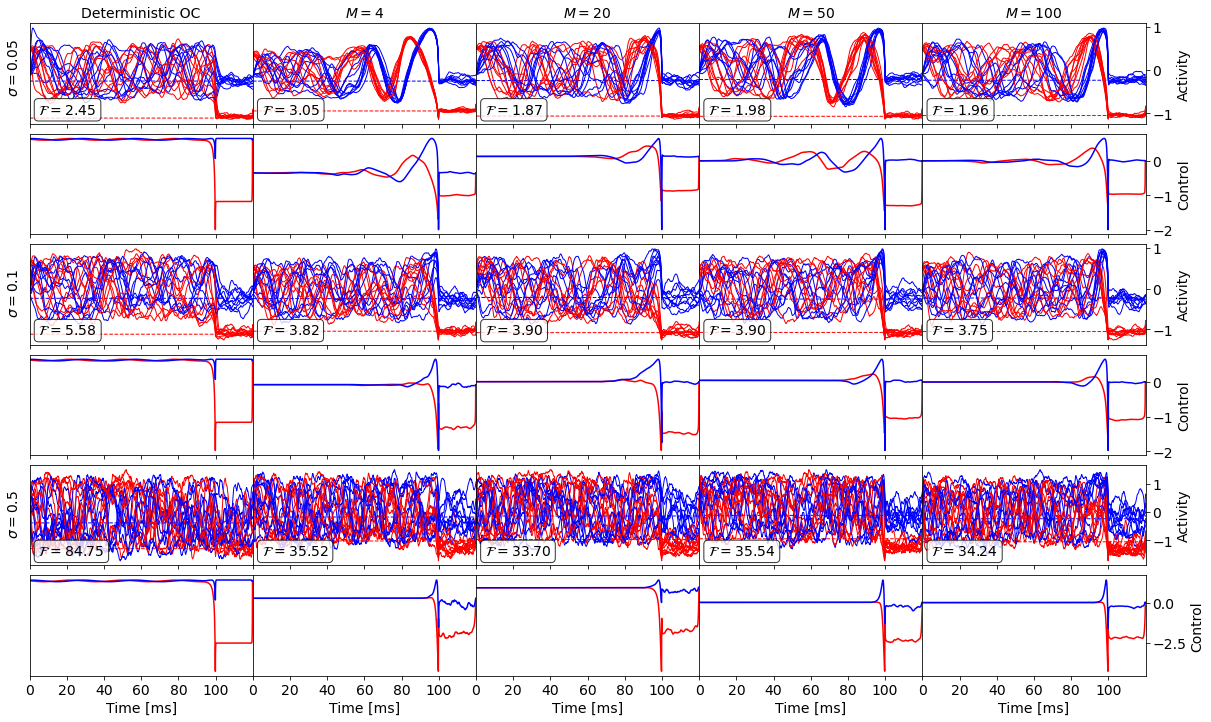

In [26]:
row, col = int(2*len(sigma_array)), int(len(M_array)+1)

fig = plt.figure(figsize=(4*col,2*row))
gs = fig.add_gridspec(row, col, hspace=0.1, wspace=0)
ax = gs.subplots(sharex='col')
box_props = dict(boxstyle='round', facecolor='white', alpha=0.8)
fs = 14
savepath = '..' + os.sep + '..' + os.sep + '..' + os.sep + 'Talks_Conf_Workshops_Schools' + os.sep + '22' + os.sep + '2022_Wittenberg' + os.sep + 'talk' + os.sep + 'talk' + os.sep + 'images'

time_array = np.arange(0, duration+dt, dt)

for i_s in range(len(sigma_array)):
    ax[2*i_s, 0].text(-0.1, 0.3, r'$\sigma = $'+ "{}".format(sigma_array[i_s]),
    transform=ax[2*i_s, 0].transAxes, rotation='vertical', fontsize=fs)

    ax[2*i_s + 1, 0].plot(time_array, control_noisefree[0,0,:], color=color_x)
    ax[2*i_s + 1, 0].plot(time_array, control_noisefree[0,1,:], color=color_y)
    
    hopf_plot.params.sigma_ou = sigma_array[i_s]

    hopf_plot.params["x_ext"] = control_noisefree[:,0,:]
    hopf_plot.params["y_ext"] = control_noisefree[:,1,:]

    ax[2*i_s, 0].plot(time_array[1:], target[0,0,1:], color=color_x, linewidth=1, linestyle='--')
    ax[2*i_s, 0].plot(time_array[1:], target[0,1,1:], color=color_y, linewidth=1, linestyle='--')

    for m in range(10):
        hopf_plot.run()
        ax[2*i_s, 0].plot(time_array[1:], hopf_plot.x[0,:], color=color_x, linewidth=1)
        ax[2*i_s, 0].plot(time_array[1:], hopf_plot.y[0,:], color=color_y, linewidth=1)

    ax[2*i_s, 0].text(0.04,0.1, r'$\mathcal{F} = $' + "{:.2f}".format(costs[i_s][0]),
        transform=ax[2*i_s, 0].transAxes, fontsize=fs, bbox=box_props)

    for i_m in range(len(M_array)):
        ax[2*i_s + 1, i_m+1].plot(time_array, controls[i_s][i_m][0,0,:], color=color_x)
        ax[2*i_s + 1, i_m+1].plot(time_array, controls[i_s][i_m][0,1,:], color=color_y)

        ax[2*i_s, i_m+1].text(0.04,0.1, r'$\mathcal{F} = $' + "{:.2f}".format(costs[i_s][i_m+1]),
        transform=ax[2*i_s, i_m+1].transAxes, fontsize=fs, bbox=box_props)

        hopf_plot.params["x_ext"] = controls[i_s][i_m][:,0,:]
        hopf_plot.params["y_ext"] = controls[i_s][i_m][:,1,:]

        ax[2*i_s, i_m+1].plot(time_array[1:], target[0,0,1:], color=color_x, linewidth=1, linestyle='--')
        ax[2*i_s, i_m+1].plot(time_array[1:], target[0,1,1:], color=color_y, linewidth=1, linestyle='--')

        for m in range(10):
            hopf_plot.run()
            ax[2*i_s, i_m+1].plot(time_array[1:], hopf_plot.x[0,:], color=color_x, linewidth=1)
            ax[2*i_s, i_m+1].plot(time_array[1:], hopf_plot.y[0,:], color=color_y, linewidth=1)



    for k in range(col-1):
        ax[2*i_s,k].set_yticks([])
        ax[2*i_s+1,k].set_yticks([])
    
    ax[2*i_s,-1].yaxis.tick_right()
    ax[2*i_s+1,-1].yaxis.tick_right()

    ax[2*i_s,-1].set_ylabel("Activity", fontsize=fs)
    ax[2*i_s,-1].yaxis.set_label_position("right")
    ax[2*i_s+1,-1].set_ylabel("Control", fontsize=fs)
    ax[2*i_s+1,-1].yaxis.set_label_position("right")


for k in range(col):
    for j in range(row-1):
        ax[j,k].set_xticks([])
        ax[j,k].set_xlim([0,duration])
        ax[j,k].tick_params(axis='both', labelsize=fs)
    ax[-1,k].set_xticks(np.arange(0,120,20))
    ax[-1,k].set_xlim([0,duration])
    ax[-1,k].tick_params(axis='both', labelsize=fs)
    ax[-1,k].set_xlabel("Time [ms]", fontsize=fs)

for i_m in range(len(M_array)):
    ax[0,i_m+1].set_title(r"$M=$" + "{}".format(M_array[i_m]), fontsize=fs)

ax[0,0].set_title(r"Deterministic OC", fontsize=fs)

fig.savefig(os.path.join(savepath, 'Hopf_osc_down_traces.jpg'))
plt.show()


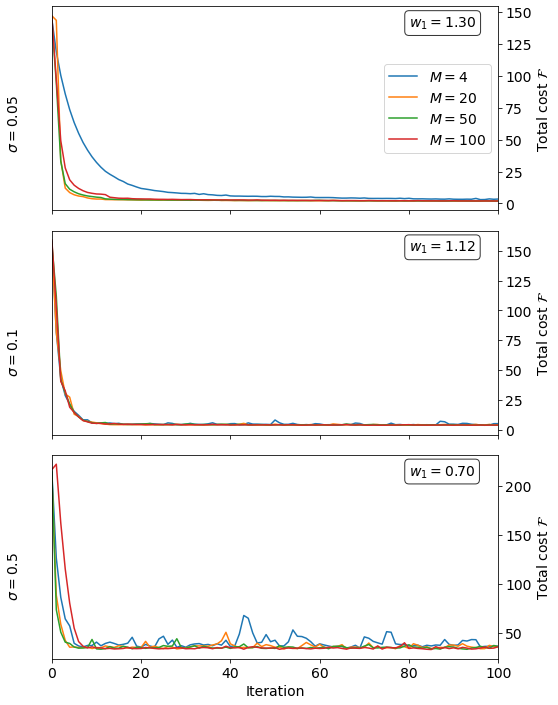

In [23]:
row, col = 3, 1

fig = plt.figure(figsize=(8,12))
gs = fig.add_gridspec(row, col, hspace=0.1, wspace=0)
ax = gs.subplots(sharex='col')

for i_s in range(len(sigma_array)):
    for i_m in range(len(M_array)):
        ax[i_s].plot(costs_history[i_s][i_m], label=r'$M=$' + '{}'.format(M_array[i_m]))

    ax[i_s].text(0.8,0.9, r'$w_1 = $' + "{:.2f}".format(weights[i_s]),
    transform=ax[i_s].transAxes, fontsize=fs, bbox=box_props)

    ax[i_s].text(-0.1, 0.3, r'$\sigma = $'+ "{}".format(sigma_array[i_s]), transform=ax[i_s].transAxes, rotation='vertical', fontsize=fs)

    ax[i_s].set_ylabel(r'Total cost $\mathcal{F}$', fontsize=fs)
    ax[i_s].yaxis.set_label_position("right")
    ax[i_s].yaxis.tick_right()
    ax[i_s].tick_params(axis='both', labelsize=fs)
    ax[i_s].set_xlim(0,max_iterations)

ax[0].legend(loc='center right', fontsize=fs)
ax[-1].set_xlabel("Iteration", fontsize=fs)

fig.savefig(os.path.join(savepath, 'Hopf_osc_down_cost.jpg'))
plt.show()